In [1]:
%matplotlib inline
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pickle
from operator import itemgetter
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
import matplotlib.animation as animation

In [2]:
# 0 eid
# 1 rid
# 2 qtot
# 3 qdom
# 4 prim_en
# 5 prim_time
# 6 prim_table_time
# 7 prim_table_charge
# 8 prim_pos
# 9 prim_dir
# 10 tau_en
# 11 tau_time
# 12 tau_table_time
# 13 tau_table_charge
# 14 tau_len
# 15 tau_pos
# 16 tau_dir
# 17 om.string
# 18 om.om
# 19 om_pos
# 20 start_time
# 21 wf_vect
# 22 wf_binwidth
c =0.299792458
n =1.3195
v=c/n 
print v

0.227201559682


In [3]:
d3 = pickle.load(open("DoublePulseWaveformDoubleBangs.pkl", "rb"))
print len(d3), len(d3[1]),len(d3[1][0]),len(d3[1][0][21])

3 756 23 128


In [4]:
def b2_pos_calc(one, one_dir, length):
    if length > 0:
        l_x = np.sin(one_dir[0])*np.cos(one_dir[1])*length
        l_y = np.sin(one_dir[0])*np.sin(one_dir[1])*length
        l_z = np.cos(one_dir[0])*length
    two = [0,0,0]
    two[0] = one[0]-l_x 
    two[1] = one[1]-l_y 
    two[2] = one[2]-l_z 
    
    return two

In [8]:
def make_data(data):
    events = []
    events_true = []
    for i in data:
        b1_pos = i[0][8]
        b1_time = i[0][5]
        b2_pos = b2_pos_calc(i[0][8],i[0][9],i[0][14])
        b2_time = i[0][11]
        
        samples = []
        weight = []
        for j in i:
            wf = j[21]
            start = j[20]
            pos = j[19]
            wf_w = j[22]
            for i in wf:
                t = (start+wf.index(i)*wf_w)*v
                x = pos[0]
                y = pos[1]
                z = pos[2]
                samples.append([x,y,z,t])
                if i >0:
                    weight.append(i/10**(-12))
                else:
                    weight.append(0)
        events.append([samples, weight])
        events_true.append([[b1_pos[0],b1_pos[1],b1_pos[2], b1_time*v], [b2_pos[0],b2_pos[1],b2_pos[2], b2_time*v]])
    return events, events_true

In [9]:
data, truth = make_data(d3)

In [10]:
print len(data), len(data[0]),len(data[0][0]),len(data[0][1])
print len(truth), len(truth[0]), truth

3 2 62208 62208
3 2 [[[286.11932192121276, -323.425136421345, 4.611700260317093, 2238.68940919651], [233.9434407193132, -508.13678034599798, -399.83985449602363, 2577.973156794777]], [[532.408691128889, 256.5780884528807, 618.8718630181731, 2146.9398090801315], [406.21753101453305, 274.11052275851733, 253.55848218437404, 2440.150914715401]], [[46.62510381499328, 291.46525862346925, 1.5782717397657962, 2843.5809549705314], [229.58757523196596, -235.49104949415403, -292.79474881519877, 3321.583785889079]]]


In [11]:
def make_plots(y_pred, data, weight, truth):
    
    split = zip(y_pred, data, weight)
    one = [[i[1],i[2]] for i in split if i[0]==1]
    two = [[i[1],i[2]] for i in split if i[0]==0]
    tri = truth
    print len(split), len(one), len(two)
    one_x = [i[0][0] for i in one]
    one_y = [i[0][1] for i in one]
    one_z = [i[0][2] for i in one]
    one_t = [i[0][3] for i in one]
    one_s = [i[1] for i in one]
     
    two_x = [i[0][0] for i in two]
    two_y = [i[0][1] for i in two]
    two_z = [i[0][2] for i in two]
    two_t = [i[0][3] for i in two]
    two_s = [i[1] for i in two]
    
    tri_x = [i[0] for i in tri]
    tri_y = [i[1] for i in tri]
    tri_z = [i[2] for i in tri]
    tri_t = [i[3] for i in tri]
    tri_s = [1000 for i in tri]
    
    fig1 = plt.figure(figsize=(12, 12))
    ax = fig1.add_subplot(111, projection='3d')
    ax.scatter(one_x, one_y, one_z, s=one_s, c='r', marker='.')
    ax.scatter(two_x, two_y, two_z, s=two_s, c='b', marker='.')
    ax.scatter(tri_x, tri_y, tri_z, s=tri_s, c='g', marker='.')
    ax.view_init(0, 30)
    
    fig2 = plt.figure(figsize=(6, 6))
    ax = fig2.add_subplot(311)
    ax.set_xlabel("Time, ns", fontsize = 14)                                                              
    ax.set_ylabel("X, m", fontsize = 14)
    ax.scatter(one_t, one_x,  s=one_s, c='r', marker='.')
    ax.scatter(two_t, two_x, s=two_s, c='b', marker='.')
    ax.scatter(tri_t, tri_x, s=tri_s, c='g', marker='.')
    ax = fig2.add_subplot(312)
    ax.set_xlabel("Time, ns", fontsize = 14)                                                              
    ax.set_ylabel("Y, m", fontsize = 14)
    ax.scatter(one_t, one_y, s=one_s, c='r', marker='.')
    ax.scatter(two_t, two_y, s=two_s, c='b', marker='.')
    ax.scatter(tri_t, tri_y, s=tri_s, c='g', marker='.')
    ax = fig2.add_subplot(313)
    ax.set_xlabel("Time, ns", fontsize = 14)                                                              
    ax.set_ylabel("Z, m", fontsize = 14)
    ax.scatter(one_t, one_z, s=two_s, c='r', marker='.')
    ax.scatter(two_t, two_z, s=two_s, c='b', marker='.')
    ax.scatter(tri_t, tri_z, s=tri_s, c='g', marker='.')
    plt.show()

In [12]:
def make_movie_points(y_pred, data, weight, truth):
    l = [list(i) for i in zip(data, y_pred, weight)]
    l2 = []
    for i in l:
        l2.append([i[0][0],i[0][1],i[0][2],i[0][3],i[1],i[2]])
    for i in truth:
        l2.append([i[0],i[1],i[2],i[3],99,1000])
    sor = sorted(l2, key=itemgetter(3))

    bins = []
    count = 0
    temp = []
    for i in sor:
        temp.append(i)
        if len(temp)==100:
            bins.append(temp)
            temp = []
    
    print len(bins)
    
    x1,y1,z1,s1 = [],[],[],[] 
    x2,y2,z2,s2 = [],[],[],[] 
    x3,y3,z3,s3 = [],[],[],[] 
           
    count = 0
    for i in bins:
        count = count +1
        fig = plt.figure(figsize=(12, 12))
        ax = fig.add_subplot(111, projection='3d')
        ax.view_init(0, 30)
        ax.set_xlim(-500,500)
        ax.set_ylim(-500,500)
        ax.set_zlim(-500,500)
        if len(i) >0:
            for j in i:
                if j[4] ==1:
                    x1.append(j[0])
                    y1.append(j[1])
                    z1.append(j[2])
                    s1.append(j[5])
                elif j[4] ==0:
                    x2.append(j[0])
                    y2.append(j[1])
                    z2.append(j[2])
                    s2.append(j[5])
                elif j[4] ==99:
                    x3.append(j[0])
                    y3.append(j[1])
                    z3.append(j[2])
                    s3.append(j[5])

                   
        name = '/home/dup193/work/notebook/movie/pic_points_{0:04d}.png'.format(count)
        ax.scatter(x1,y1,z1,s=s1,c='r', alpha =0.5, marker='o')
        ax.scatter(x2,y2,z2,s=s2,c='b', alpha =0.5, marker='o')
        ax.scatter(x3,y3,z3,s=s3,c='g', alpha =0.5, marker='o')
        plt.savefig(name)
        print name, len(i)
        plt.close(fig)

In [13]:
def make_movie_times(y_pred, data, weight, truth):
    l = [list(i) for i in zip(data, y_pred, weight)]
    l2 = []
    for i in l:
        l2.append([i[0][0],i[0][1],i[0][2],i[0][3],i[1],i[2]])
    for i in truth:
        l2.append([i[0],i[1],i[2],i[3],99,1000])
    
    sor = sorted(l2, key=itemgetter(3))

    mint = sor[0][3]
    maxt = sor[-1][3]
    
    bins = []
    ts = range(int(mint), int(maxt), 10)

    for i in range(0, len(ts)-1):
        bins.append([j for j in sor if ts[i]<j[3]<ts[i+1]])
    
    print len(bins)
    
    x1,y1,z1,s1 = [],[],[],[] 
    x2,y2,z2,s2 = [],[],[],[] 
    x3,y3,z3,s3 = [],[],[],[] 
    x4,y4,z4,s4 = [],[],[],[]        
    count = 0
    for i in bins:
        count = count +1
        fig = plt.figure(figsize=(12, 12))
        ax = fig.add_subplot(111, projection='3d')
        ax.view_init(0, 30)
        ax.set_xlim(-500,500)
        ax.set_ylim(-500,500)
        ax.set_zlim(-500,500)
        if len(i) >0:
            for j in i:
                if j[4] ==1:
                    x1.append(j[0])
                    y1.append(j[1])
                    z1.append(j[2])
                    s1.append(j[5])
                elif j[4] ==0:
                    x2.append(j[0])
                    y2.append(j[1])
                    z2.append(j[2])
                    s2.append(j[5])
                elif j[4] ==99:
                    x3.append(j[0])
                    y3.append(j[1])
                    z3.append(j[2])
                    s3.append(j[5])
                else:
                    x4.append(j[0])
                    y4.append(j[1])
                    z4.append(j[2])
                    s4.append(j[5])

                   
        name = '/home/dup193/work/notebook/movie/pic_times_{0:04d}.png'.format(count)
        ax.scatter(x1,y1,z1,s=s1,c='r', alpha =0.5, marker='o')
        ax.scatter(x2,y2,z2,s=s2,c='b', alpha =0.5, marker='o')
        ax.scatter(x3,y3,z3,s=s3,c='g', alpha =0.5, marker='o')
        ax.scatter(x4,y4,z4,s=s4,c='k', alpha =0.5, marker='o')
        plt.savefig(name)
        print name, len(i)
        plt.close(fig)

In [14]:
def make_movie_times_slide(y_pred, data, weight, truth):
    l = [list(i) for i in zip(data, y_pred, weight)]
    l2 = []
    for i in l:
        l2.append([i[0][0],i[0][1],i[0][2],i[0][3],i[1],i[2]])
    for i in truth:
        l2.append([i[0],i[1],i[2],i[3],99,1000])
    
    sor = sorted(l2, key=itemgetter(3))

    mint = sor[0][3]
    maxt = sor[-1][3]
    
    bins = []
    ts = range(int(mint), int(maxt), 10)

    for i in range(0, len(ts)-1):
        bins.append([j for j in sor if ts[i]<j[3]<ts[i+1]])
    
    print len(bins)
    
    x3,y3,z3,s3 = [],[],[],[]        
    count = 0
    for i in bins:
        x1,y1,z1,s1 = [],[],[],[] 
        x2,y2,z2,s2 = [],[],[],[] 
        x4,y4,z4,s4 = [],[],[],[] 
        count = count +1
        fig = plt.figure(figsize=(12, 12))
        ax = fig.add_subplot(111, projection='3d')
        ax.view_init(0, 30)
        ax.set_xlim(-500,500)
        ax.set_ylim(-500,500)
        ax.set_zlim(-500,500)
        if len(i) >0:
            for j in i:
                if j[4] ==1:
                    x1.append(j[0])
                    y1.append(j[1])
                    z1.append(j[2])
                    s1.append(j[5])
                elif j[4] ==0:
                    x2.append(j[0])
                    y2.append(j[1])
                    z2.append(j[2])
                    s2.append(j[5])
                elif j[4] ==99:
                    x3.append(j[0])
                    y3.append(j[1])
                    z3.append(j[2])
                    s3.append(j[5])
                else:
                    x4.append(j[0])
                    y4.append(j[1])
                    z4.append(j[2])
                    s4.append(j[5])

                   
        name = '/home/dup193/work/notebook/movie/pic_times_{0:04d}.png'.format(count)
        ax.scatter(x1,y1,z1,s=s1,c='r', alpha =0.5, marker='o', label = 'bang1')
        ax.scatter(x2,y2,z2,s=s2,c='b', alpha =0.5, marker='o', label = 'bang2')
        ax.scatter(x3,y3,z3,s=s3,c='g', alpha =0.5, marker='o', label = 'TrueVertex')
        ax.scatter(x4,y4,z4,s=s4,c='k', alpha =0.5, marker='o', label = 'other')
        plt.savefig(name)
        plt.legend()
        print name, len(i)
        plt.close(fig)

62208 38235 23973


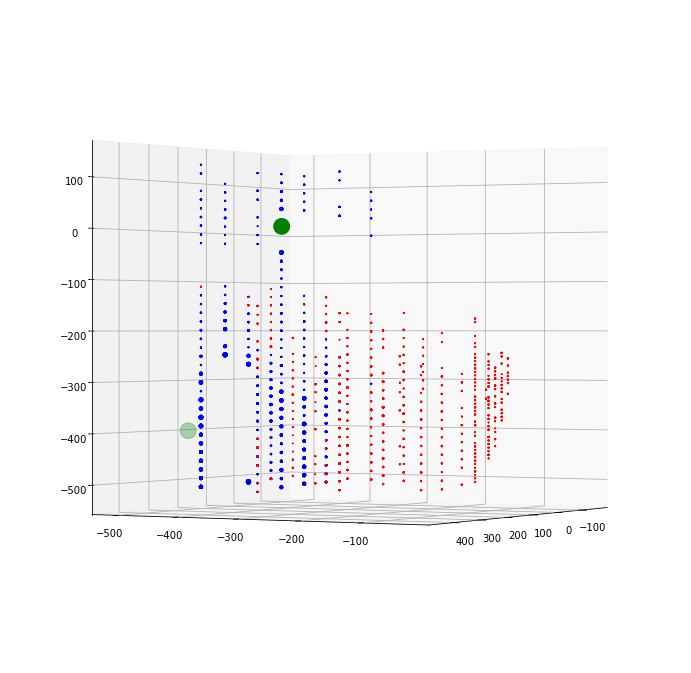

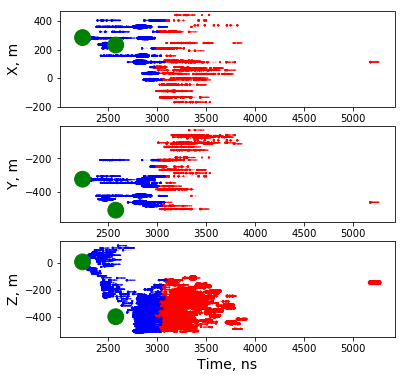

In [15]:
y_pred_0 = KMeans(n_clusters=2).fit_predict(data[0][0],data[0][1])
make_plots(y_pred_0,data[0][0],data[0][1],truth[0])

In [24]:
make_movie_times_slide(y_pred_0,data[0][0],data[0][1],truth[0])

303
/home/dup193/work/notebook/movie/pic_times_0001.png 1
/home/dup193/work/notebook/movie/pic_times_0002.png 0
/home/dup193/work/notebook/movie/pic_times_0003.png 0
/home/dup193/work/notebook/movie/pic_times_0004.png 8
/home/dup193/work/notebook/movie/pic_times_0005.png 15
/home/dup193/work/notebook/movie/pic_times_0006.png 26
/home/dup193/work/notebook/movie/pic_times_0007.png 38
/home/dup193/work/notebook/movie/pic_times_0008.png 41
/home/dup193/work/notebook/movie/pic_times_0009.png 49
/home/dup193/work/notebook/movie/pic_times_0010.png 77
/home/dup193/work/notebook/movie/pic_times_0011.png 78
/home/dup193/work/notebook/movie/pic_times_0012.png 78
/home/dup193/work/notebook/movie/pic_times_0013.png 92
/home/dup193/work/notebook/movie/pic_times_0014.png 79
/home/dup193/work/notebook/movie/pic_times_0015.png 97
/home/dup193/work/notebook/movie/pic_times_0016.png 134
/home/dup193/work/notebook/movie/pic_times_0017.png 154
/home/dup193/work/notebook/movie/pic_times_0018.png 177
/home/d

/home/dup193/work/notebook/movie/pic_times_0148.png 107
/home/dup193/work/notebook/movie/pic_times_0149.png 91
/home/dup193/work/notebook/movie/pic_times_0150.png 91
/home/dup193/work/notebook/movie/pic_times_0151.png 84
/home/dup193/work/notebook/movie/pic_times_0152.png 93
/home/dup193/work/notebook/movie/pic_times_0153.png 82
/home/dup193/work/notebook/movie/pic_times_0154.png 82
/home/dup193/work/notebook/movie/pic_times_0155.png 82
/home/dup193/work/notebook/movie/pic_times_0156.png 65
/home/dup193/work/notebook/movie/pic_times_0157.png 39
/home/dup193/work/notebook/movie/pic_times_0158.png 31
/home/dup193/work/notebook/movie/pic_times_0159.png 40
/home/dup193/work/notebook/movie/pic_times_0160.png 40
/home/dup193/work/notebook/movie/pic_times_0161.png 31
/home/dup193/work/notebook/movie/pic_times_0162.png 26
/home/dup193/work/notebook/movie/pic_times_0163.png 26
/home/dup193/work/notebook/movie/pic_times_0164.png 19
/home/dup193/work/notebook/movie/pic_times_0165.png 13
/home/dup

/home/dup193/work/notebook/movie/pic_times_0300.png 14
/home/dup193/work/notebook/movie/pic_times_0301.png 13
/home/dup193/work/notebook/movie/pic_times_0302.png 13
/home/dup193/work/notebook/movie/pic_times_0303.png 13


96768 38965 57803


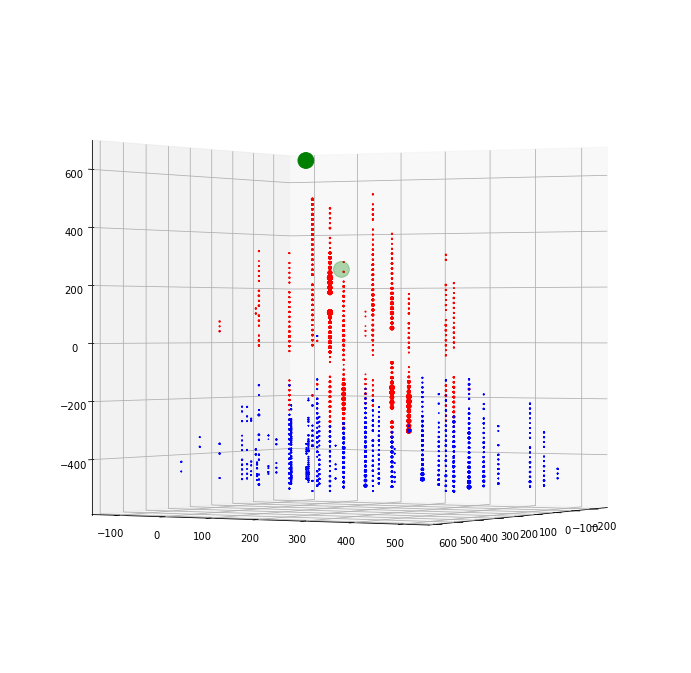

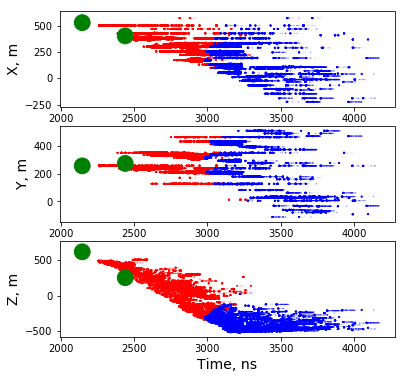

In [40]:
y_pred_1 = KMeans(n_clusters=2).fit_predict(data[1][0],data[1][1])
make_plots(y_pred_1,data[1][0],data[1][1],truth[1])

In [42]:
make_movie_times(y_pred_1,data[1][0],data[1][1],truth[1])

203
/home/dup193/work/notebook/movie/pic_times_0001.png 1
/home/dup193/work/notebook/movie/pic_times_0002.png 0
/home/dup193/work/notebook/movie/pic_times_0003.png 0
/home/dup193/work/notebook/movie/pic_times_0004.png 0
/home/dup193/work/notebook/movie/pic_times_0005.png 0
/home/dup193/work/notebook/movie/pic_times_0006.png 0
/home/dup193/work/notebook/movie/pic_times_0007.png 0
/home/dup193/work/notebook/movie/pic_times_0008.png 0
/home/dup193/work/notebook/movie/pic_times_0009.png 0
/home/dup193/work/notebook/movie/pic_times_0010.png 0
/home/dup193/work/notebook/movie/pic_times_0011.png 3
/home/dup193/work/notebook/movie/pic_times_0012.png 13
/home/dup193/work/notebook/movie/pic_times_0013.png 25
/home/dup193/work/notebook/movie/pic_times_0014.png 27
/home/dup193/work/notebook/movie/pic_times_0015.png 26
/home/dup193/work/notebook/movie/pic_times_0016.png 35
/home/dup193/work/notebook/movie/pic_times_0017.png 39
/home/dup193/work/notebook/movie/pic_times_0018.png 53
/home/dup193/work

/home/dup193/work/notebook/movie/pic_times_0148.png 480
/home/dup193/work/notebook/movie/pic_times_0149.png 504
/home/dup193/work/notebook/movie/pic_times_0150.png 448
/home/dup193/work/notebook/movie/pic_times_0151.png 457
/home/dup193/work/notebook/movie/pic_times_0152.png 469
/home/dup193/work/notebook/movie/pic_times_0153.png 503
/home/dup193/work/notebook/movie/pic_times_0154.png 476
/home/dup193/work/notebook/movie/pic_times_0155.png 488
/home/dup193/work/notebook/movie/pic_times_0156.png 477
/home/dup193/work/notebook/movie/pic_times_0157.png 505
/home/dup193/work/notebook/movie/pic_times_0158.png 474
/home/dup193/work/notebook/movie/pic_times_0159.png 388
/home/dup193/work/notebook/movie/pic_times_0160.png 380
/home/dup193/work/notebook/movie/pic_times_0161.png 328
/home/dup193/work/notebook/movie/pic_times_0162.png 310
/home/dup193/work/notebook/movie/pic_times_0163.png 319
/home/dup193/work/notebook/movie/pic_times_0164.png 325
/home/dup193/work/notebook/movie/pic_times_0165.

In [43]:
make_movie_times_slide(y_pred_1,data[1][0],data[1][1],truth[1])

203
/home/dup193/work/notebook/movie/pic_times_0001.png 1
/home/dup193/work/notebook/movie/pic_times_0002.png 0
/home/dup193/work/notebook/movie/pic_times_0003.png 0
/home/dup193/work/notebook/movie/pic_times_0004.png 0
/home/dup193/work/notebook/movie/pic_times_0005.png 0
/home/dup193/work/notebook/movie/pic_times_0006.png 0
/home/dup193/work/notebook/movie/pic_times_0007.png 0
/home/dup193/work/notebook/movie/pic_times_0008.png 0
/home/dup193/work/notebook/movie/pic_times_0009.png 0
/home/dup193/work/notebook/movie/pic_times_0010.png 0
/home/dup193/work/notebook/movie/pic_times_0011.png 3
/home/dup193/work/notebook/movie/pic_times_0012.png 13
/home/dup193/work/notebook/movie/pic_times_0013.png 25
/home/dup193/work/notebook/movie/pic_times_0014.png 27
/home/dup193/work/notebook/movie/pic_times_0015.png 26
/home/dup193/work/notebook/movie/pic_times_0016.png 35
/home/dup193/work/notebook/movie/pic_times_0017.png 39
/home/dup193/work/notebook/movie/pic_times_0018.png 53
/home/dup193/work

/home/dup193/work/notebook/movie/pic_times_0148.png 480
/home/dup193/work/notebook/movie/pic_times_0149.png 504
/home/dup193/work/notebook/movie/pic_times_0150.png 448
/home/dup193/work/notebook/movie/pic_times_0151.png 457
/home/dup193/work/notebook/movie/pic_times_0152.png 469
/home/dup193/work/notebook/movie/pic_times_0153.png 503
/home/dup193/work/notebook/movie/pic_times_0154.png 476
/home/dup193/work/notebook/movie/pic_times_0155.png 488
/home/dup193/work/notebook/movie/pic_times_0156.png 477
/home/dup193/work/notebook/movie/pic_times_0157.png 505
/home/dup193/work/notebook/movie/pic_times_0158.png 474
/home/dup193/work/notebook/movie/pic_times_0159.png 388
/home/dup193/work/notebook/movie/pic_times_0160.png 380
/home/dup193/work/notebook/movie/pic_times_0161.png 328
/home/dup193/work/notebook/movie/pic_times_0162.png 310
/home/dup193/work/notebook/movie/pic_times_0163.png 319
/home/dup193/work/notebook/movie/pic_times_0164.png 325
/home/dup193/work/notebook/movie/pic_times_0165.

154496 42661 111835


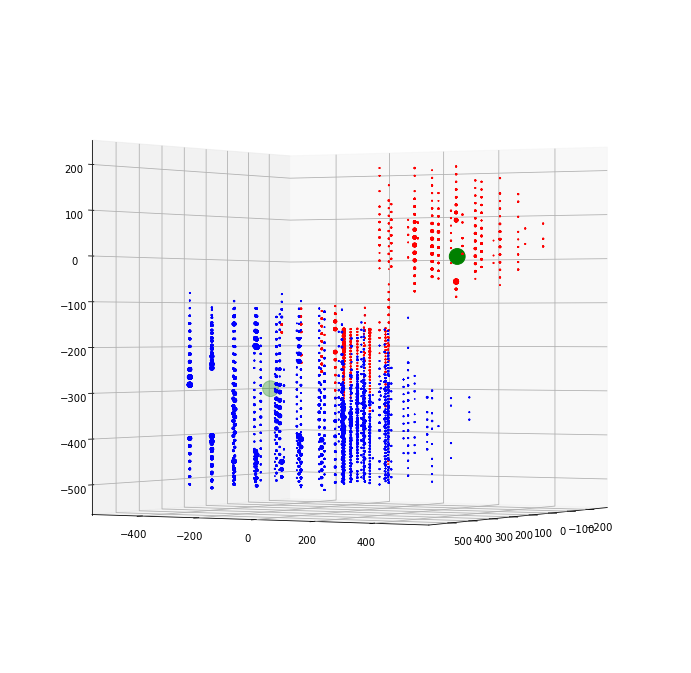

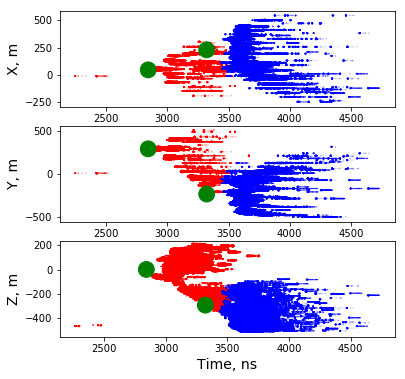

In [44]:
y_pred_2 = KMeans(n_clusters=2).fit_predict(data[2][0],data[2][1])
make_plots(y_pred_2,data[2][0],data[2][1],truth[2])

In [45]:
make_movie_times(y_pred_2,data[2][0],data[2][1],truth[2])

249
/home/dup193/work/notebook/movie/pic_times_0001.png 13
/home/dup193/work/notebook/movie/pic_times_0002.png 13
/home/dup193/work/notebook/movie/pic_times_0003.png 13
/home/dup193/work/notebook/movie/pic_times_0004.png 14
/home/dup193/work/notebook/movie/pic_times_0005.png 13
/home/dup193/work/notebook/movie/pic_times_0006.png 13
/home/dup193/work/notebook/movie/pic_times_0007.png 13
/home/dup193/work/notebook/movie/pic_times_0008.png 13
/home/dup193/work/notebook/movie/pic_times_0009.png 14
/home/dup193/work/notebook/movie/pic_times_0010.png 9
/home/dup193/work/notebook/movie/pic_times_0011.png 0
/home/dup193/work/notebook/movie/pic_times_0012.png 0
/home/dup193/work/notebook/movie/pic_times_0013.png 0
/home/dup193/work/notebook/movie/pic_times_0014.png 0
/home/dup193/work/notebook/movie/pic_times_0015.png 0
/home/dup193/work/notebook/movie/pic_times_0016.png 0
/home/dup193/work/notebook/movie/pic_times_0017.png 0
/home/dup193/work/notebook/movie/pic_times_0018.png 9
/home/dup193/wo

/home/dup193/work/notebook/movie/pic_times_0149.png 2546
/home/dup193/work/notebook/movie/pic_times_0150.png 2468
/home/dup193/work/notebook/movie/pic_times_0151.png 2459
/home/dup193/work/notebook/movie/pic_times_0152.png 2428
/home/dup193/work/notebook/movie/pic_times_0153.png 2393
/home/dup193/work/notebook/movie/pic_times_0154.png 2276
/home/dup193/work/notebook/movie/pic_times_0155.png 2245
/home/dup193/work/notebook/movie/pic_times_0156.png 2261
/home/dup193/work/notebook/movie/pic_times_0157.png 2164
/home/dup193/work/notebook/movie/pic_times_0158.png 2020
/home/dup193/work/notebook/movie/pic_times_0159.png 1973
/home/dup193/work/notebook/movie/pic_times_0160.png 1891
/home/dup193/work/notebook/movie/pic_times_0161.png 1788
/home/dup193/work/notebook/movie/pic_times_0162.png 1650
/home/dup193/work/notebook/movie/pic_times_0163.png 1546
/home/dup193/work/notebook/movie/pic_times_0164.png 1517
/home/dup193/work/notebook/movie/pic_times_0165.png 1470
/home/dup193/work/notebook/movi

In [46]:
make_movie_times_slide(y_pred_2,data[2][0],data[2][1],truth[2])

249
/home/dup193/work/notebook/movie/pic_times_0001.png 13
/home/dup193/work/notebook/movie/pic_times_0002.png 13
/home/dup193/work/notebook/movie/pic_times_0003.png 13
/home/dup193/work/notebook/movie/pic_times_0004.png 14
/home/dup193/work/notebook/movie/pic_times_0005.png 13
/home/dup193/work/notebook/movie/pic_times_0006.png 13
/home/dup193/work/notebook/movie/pic_times_0007.png 13
/home/dup193/work/notebook/movie/pic_times_0008.png 13
/home/dup193/work/notebook/movie/pic_times_0009.png 14
/home/dup193/work/notebook/movie/pic_times_0010.png 9
/home/dup193/work/notebook/movie/pic_times_0011.png 0
/home/dup193/work/notebook/movie/pic_times_0012.png 0
/home/dup193/work/notebook/movie/pic_times_0013.png 0
/home/dup193/work/notebook/movie/pic_times_0014.png 0
/home/dup193/work/notebook/movie/pic_times_0015.png 0
/home/dup193/work/notebook/movie/pic_times_0016.png 0
/home/dup193/work/notebook/movie/pic_times_0017.png 0
/home/dup193/work/notebook/movie/pic_times_0018.png 9
/home/dup193/wo

/home/dup193/work/notebook/movie/pic_times_0149.png 2546
/home/dup193/work/notebook/movie/pic_times_0150.png 2468
/home/dup193/work/notebook/movie/pic_times_0151.png 2459
/home/dup193/work/notebook/movie/pic_times_0152.png 2428
/home/dup193/work/notebook/movie/pic_times_0153.png 2393
/home/dup193/work/notebook/movie/pic_times_0154.png 2276
/home/dup193/work/notebook/movie/pic_times_0155.png 2245
/home/dup193/work/notebook/movie/pic_times_0156.png 2261
/home/dup193/work/notebook/movie/pic_times_0157.png 2164
/home/dup193/work/notebook/movie/pic_times_0158.png 2020
/home/dup193/work/notebook/movie/pic_times_0159.png 1973
/home/dup193/work/notebook/movie/pic_times_0160.png 1891
/home/dup193/work/notebook/movie/pic_times_0161.png 1788
/home/dup193/work/notebook/movie/pic_times_0162.png 1650
/home/dup193/work/notebook/movie/pic_times_0163.png 1546
/home/dup193/work/notebook/movie/pic_times_0164.png 1517
/home/dup193/work/notebook/movie/pic_times_0165.png 1470
/home/dup193/work/notebook/movi

62208 9190 53018


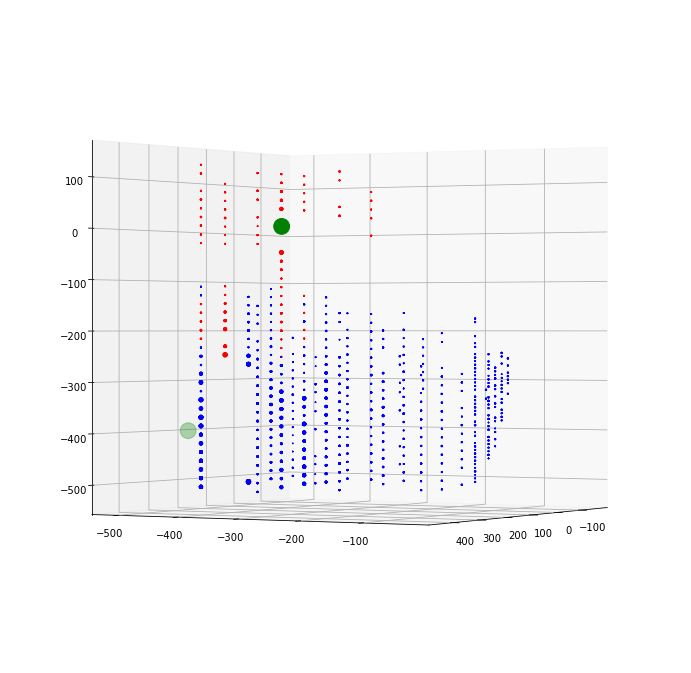

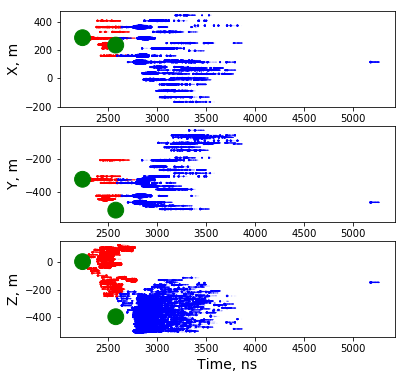

In [47]:
y_pred_0_birch = Birch(n_clusters=2).fit_predict(data[0][0],data[0][1])
make_plots(y_pred_0_birch,data[0][0],data[0][1],truth[0])

In [ ]:
make_movie_times(y_pred_0_birch,data[0][0],data[0][1],truth[0])

In [ ]:
make_movie_times_slide(y_pred_0_birch,data[0][0],data[0][1],truth[0])

62208 9190 53018


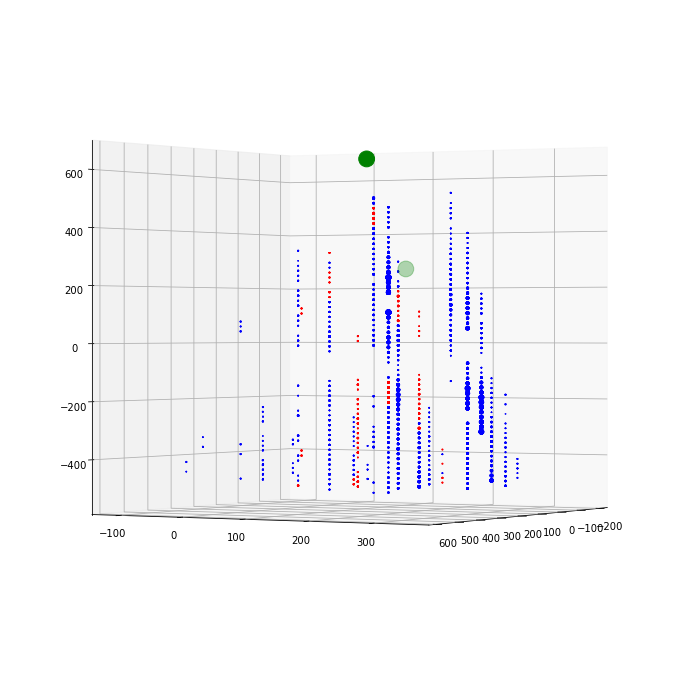

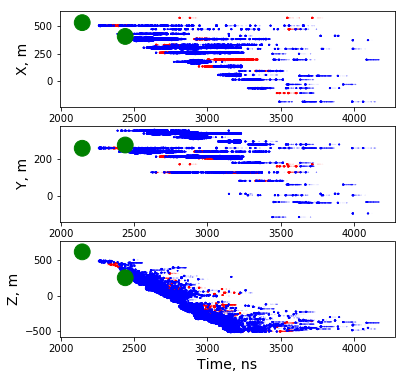

In [48]:
y_pred_1_birch = Birch(n_clusters=2).fit_predict(data[1][0],data[1][1])
make_plots(y_pred_0_birch,data[1][0],data[1][1],truth[1])


In [49]:
make_movie_times(y_pred_1_birch,data[1][0],data[1][1],truth[1])

203
/home/dup193/work/notebook/movie/pic_times_0001.png 1
/home/dup193/work/notebook/movie/pic_times_0002.png 0
/home/dup193/work/notebook/movie/pic_times_0003.png 0
/home/dup193/work/notebook/movie/pic_times_0004.png 0
/home/dup193/work/notebook/movie/pic_times_0005.png 0
/home/dup193/work/notebook/movie/pic_times_0006.png 0
/home/dup193/work/notebook/movie/pic_times_0007.png 0
/home/dup193/work/notebook/movie/pic_times_0008.png 0
/home/dup193/work/notebook/movie/pic_times_0009.png 0
/home/dup193/work/notebook/movie/pic_times_0010.png 0
/home/dup193/work/notebook/movie/pic_times_0011.png 3
/home/dup193/work/notebook/movie/pic_times_0012.png 13
/home/dup193/work/notebook/movie/pic_times_0013.png 25
/home/dup193/work/notebook/movie/pic_times_0014.png 27
/home/dup193/work/notebook/movie/pic_times_0015.png 26
/home/dup193/work/notebook/movie/pic_times_0016.png 35
/home/dup193/work/notebook/movie/pic_times_0017.png 39
/home/dup193/work/notebook/movie/pic_times_0018.png 53
/home/dup193/work

/home/dup193/work/notebook/movie/pic_times_0148.png 480
/home/dup193/work/notebook/movie/pic_times_0149.png 504
/home/dup193/work/notebook/movie/pic_times_0150.png 448
/home/dup193/work/notebook/movie/pic_times_0151.png 457
/home/dup193/work/notebook/movie/pic_times_0152.png 469
/home/dup193/work/notebook/movie/pic_times_0153.png 503
/home/dup193/work/notebook/movie/pic_times_0154.png 476
/home/dup193/work/notebook/movie/pic_times_0155.png 488
/home/dup193/work/notebook/movie/pic_times_0156.png 477
/home/dup193/work/notebook/movie/pic_times_0157.png 505
/home/dup193/work/notebook/movie/pic_times_0158.png 474
/home/dup193/work/notebook/movie/pic_times_0159.png 388
/home/dup193/work/notebook/movie/pic_times_0160.png 380
/home/dup193/work/notebook/movie/pic_times_0161.png 328
/home/dup193/work/notebook/movie/pic_times_0162.png 310
/home/dup193/work/notebook/movie/pic_times_0163.png 319
/home/dup193/work/notebook/movie/pic_times_0164.png 325
/home/dup193/work/notebook/movie/pic_times_0165.

In [50]:
make_movie_times_slide(y_pred_1_birch,data[1][0],data[1][1],truth[1])

203
/home/dup193/work/notebook/movie/pic_times_0001.png 1
/home/dup193/work/notebook/movie/pic_times_0002.png 0
/home/dup193/work/notebook/movie/pic_times_0003.png 0
/home/dup193/work/notebook/movie/pic_times_0004.png 0
/home/dup193/work/notebook/movie/pic_times_0005.png 0
/home/dup193/work/notebook/movie/pic_times_0006.png 0
/home/dup193/work/notebook/movie/pic_times_0007.png 0
/home/dup193/work/notebook/movie/pic_times_0008.png 0
/home/dup193/work/notebook/movie/pic_times_0009.png 0
/home/dup193/work/notebook/movie/pic_times_0010.png 0
/home/dup193/work/notebook/movie/pic_times_0011.png 3
/home/dup193/work/notebook/movie/pic_times_0012.png 13
/home/dup193/work/notebook/movie/pic_times_0013.png 25
/home/dup193/work/notebook/movie/pic_times_0014.png 27
/home/dup193/work/notebook/movie/pic_times_0015.png 26
/home/dup193/work/notebook/movie/pic_times_0016.png 35
/home/dup193/work/notebook/movie/pic_times_0017.png 39
/home/dup193/work/notebook/movie/pic_times_0018.png 53
/home/dup193/work

/home/dup193/work/notebook/movie/pic_times_0148.png 480
/home/dup193/work/notebook/movie/pic_times_0149.png 504
/home/dup193/work/notebook/movie/pic_times_0150.png 448
/home/dup193/work/notebook/movie/pic_times_0151.png 457
/home/dup193/work/notebook/movie/pic_times_0152.png 469
/home/dup193/work/notebook/movie/pic_times_0153.png 503
/home/dup193/work/notebook/movie/pic_times_0154.png 476
/home/dup193/work/notebook/movie/pic_times_0155.png 488
/home/dup193/work/notebook/movie/pic_times_0156.png 477
/home/dup193/work/notebook/movie/pic_times_0157.png 505
/home/dup193/work/notebook/movie/pic_times_0158.png 474
/home/dup193/work/notebook/movie/pic_times_0159.png 388
/home/dup193/work/notebook/movie/pic_times_0160.png 380
/home/dup193/work/notebook/movie/pic_times_0161.png 328
/home/dup193/work/notebook/movie/pic_times_0162.png 310
/home/dup193/work/notebook/movie/pic_times_0163.png 319
/home/dup193/work/notebook/movie/pic_times_0164.png 325
/home/dup193/work/notebook/movie/pic_times_0165.

154496 42512 111984


/home/dup193/anaconda2/lib/python2.7/site-packages/matplotlib/collections.py:877: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


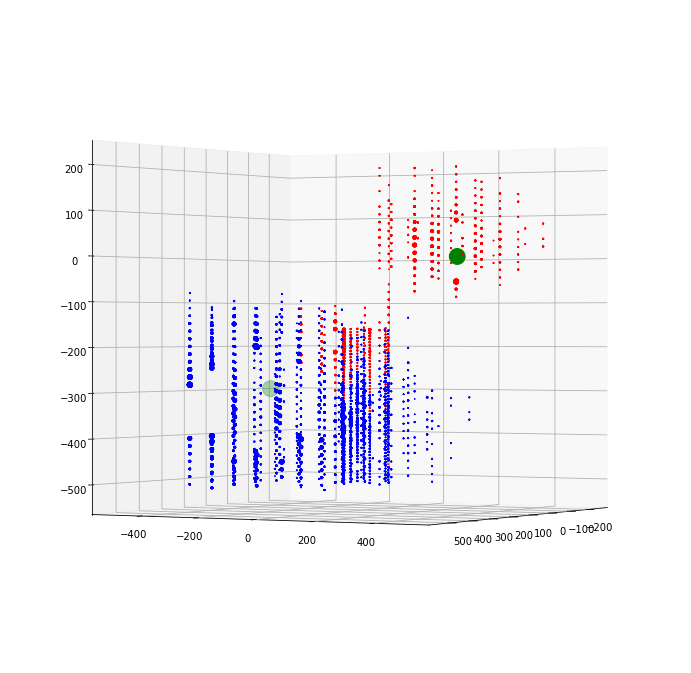

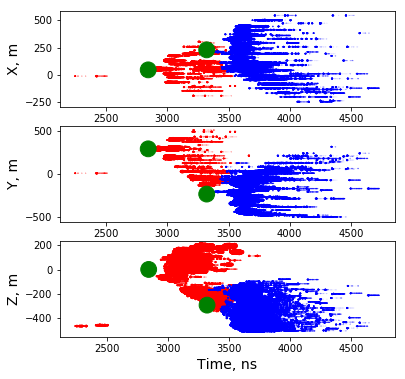

In [13]:
y_pred_2_birch = Birch(n_clusters=2).fit_predict(data[2][0],data[2][1])
make_plots(y_pred_2_birch,data[2][0],data[2][1],truth[2])

In [14]:
make_movie_times(y_pred_2_birch,data[2][0],data[2][1],truth[2])

249
/home/dup193/work/notebook/movie/pic_times_0001.png 13
/home/dup193/work/notebook/movie/pic_times_0002.png 13
/home/dup193/work/notebook/movie/pic_times_0003.png 13
/home/dup193/work/notebook/movie/pic_times_0004.png 14
/home/dup193/work/notebook/movie/pic_times_0005.png 13
/home/dup193/work/notebook/movie/pic_times_0006.png 13
/home/dup193/work/notebook/movie/pic_times_0007.png 13
/home/dup193/work/notebook/movie/pic_times_0008.png 13
/home/dup193/work/notebook/movie/pic_times_0009.png 14
/home/dup193/work/notebook/movie/pic_times_0010.png 9
/home/dup193/work/notebook/movie/pic_times_0011.png 0
/home/dup193/work/notebook/movie/pic_times_0012.png 0
/home/dup193/work/notebook/movie/pic_times_0013.png 0
/home/dup193/work/notebook/movie/pic_times_0014.png 0
/home/dup193/work/notebook/movie/pic_times_0015.png 0
/home/dup193/work/notebook/movie/pic_times_0016.png 0
/home/dup193/work/notebook/movie/pic_times_0017.png 0
/home/dup193/work/notebook/movie/pic_times_0018.png 9
/home/dup193/wo

/home/dup193/work/notebook/movie/pic_times_0149.png 2546
/home/dup193/work/notebook/movie/pic_times_0150.png 2468
/home/dup193/work/notebook/movie/pic_times_0151.png 2459
/home/dup193/work/notebook/movie/pic_times_0152.png 2428
/home/dup193/work/notebook/movie/pic_times_0153.png 2393
/home/dup193/work/notebook/movie/pic_times_0154.png 2276
/home/dup193/work/notebook/movie/pic_times_0155.png 2245
/home/dup193/work/notebook/movie/pic_times_0156.png 2261
/home/dup193/work/notebook/movie/pic_times_0157.png 2164
/home/dup193/work/notebook/movie/pic_times_0158.png 2020
/home/dup193/work/notebook/movie/pic_times_0159.png 1973
/home/dup193/work/notebook/movie/pic_times_0160.png 1891
/home/dup193/work/notebook/movie/pic_times_0161.png 1788
/home/dup193/work/notebook/movie/pic_times_0162.png 1650
/home/dup193/work/notebook/movie/pic_times_0163.png 1546
/home/dup193/work/notebook/movie/pic_times_0164.png 1517
/home/dup193/work/notebook/movie/pic_times_0165.png 1470
/home/dup193/work/notebook/movi

In [15]:
make_movie_times_slide(y_pred_2_birch,data[2][0],data[2][1],truth[2])

249
/home/dup193/work/notebook/movie/pic_times_0001.png 13
/home/dup193/work/notebook/movie/pic_times_0002.png 13
/home/dup193/work/notebook/movie/pic_times_0003.png 13
/home/dup193/work/notebook/movie/pic_times_0004.png 14
/home/dup193/work/notebook/movie/pic_times_0005.png 13
/home/dup193/work/notebook/movie/pic_times_0006.png 13
/home/dup193/work/notebook/movie/pic_times_0007.png 13
/home/dup193/work/notebook/movie/pic_times_0008.png 13
/home/dup193/work/notebook/movie/pic_times_0009.png 14
/home/dup193/work/notebook/movie/pic_times_0010.png 9
/home/dup193/work/notebook/movie/pic_times_0011.png 0
/home/dup193/work/notebook/movie/pic_times_0012.png 0
/home/dup193/work/notebook/movie/pic_times_0013.png 0
/home/dup193/work/notebook/movie/pic_times_0014.png 0
/home/dup193/work/notebook/movie/pic_times_0015.png 0
/home/dup193/work/notebook/movie/pic_times_0016.png 0
/home/dup193/work/notebook/movie/pic_times_0017.png 0
/home/dup193/work/notebook/movie/pic_times_0018.png 9
/home/dup193/wo

/home/dup193/work/notebook/movie/pic_times_0149.png 2546
/home/dup193/work/notebook/movie/pic_times_0150.png 2468
/home/dup193/work/notebook/movie/pic_times_0151.png 2459
/home/dup193/work/notebook/movie/pic_times_0152.png 2428
/home/dup193/work/notebook/movie/pic_times_0153.png 2393
/home/dup193/work/notebook/movie/pic_times_0154.png 2276
/home/dup193/work/notebook/movie/pic_times_0155.png 2245
/home/dup193/work/notebook/movie/pic_times_0156.png 2261
/home/dup193/work/notebook/movie/pic_times_0157.png 2164
/home/dup193/work/notebook/movie/pic_times_0158.png 2020
/home/dup193/work/notebook/movie/pic_times_0159.png 1973
/home/dup193/work/notebook/movie/pic_times_0160.png 1891
/home/dup193/work/notebook/movie/pic_times_0161.png 1788
/home/dup193/work/notebook/movie/pic_times_0162.png 1650
/home/dup193/work/notebook/movie/pic_times_0163.png 1546
/home/dup193/work/notebook/movie/pic_times_0164.png 1517
/home/dup193/work/notebook/movie/pic_times_0165.png 1470
/home/dup193/work/notebook/movi

154496 42512 95616


/home/dup193/anaconda2/lib/python2.7/site-packages/matplotlib/collections.py:877: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


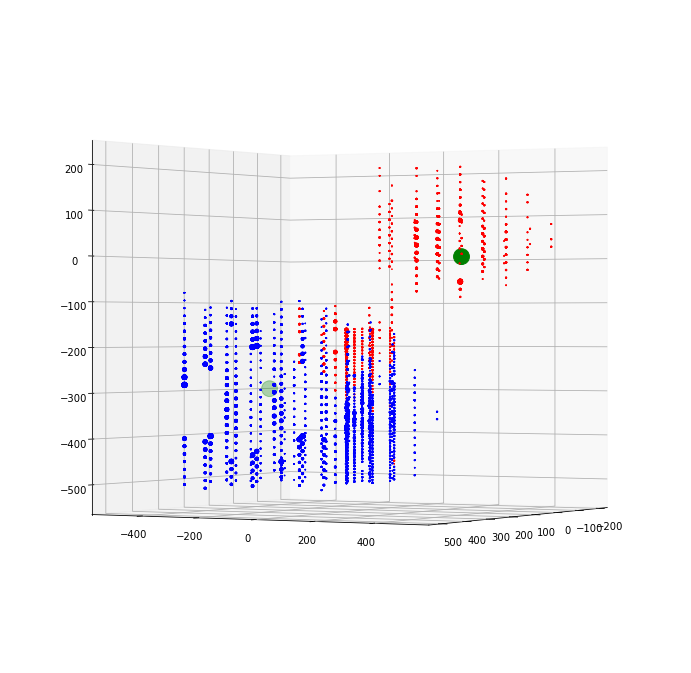

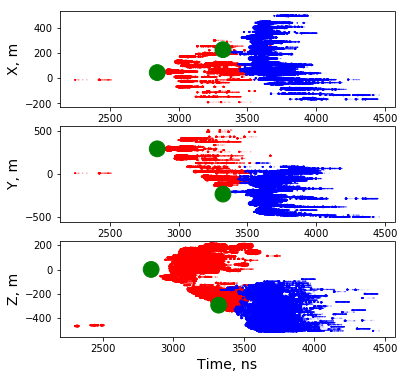

In [12]:
y_pred_2_birch_3C = Birch(n_clusters=3).fit_predict(data[2][0],data[2][1])
make_plots(y_pred_2_birch_3C,data[2][0],data[2][1],truth[2])

In [ ]:
make_movie_times(y_pred_2_birch_3C,data[2][0],data[2][1],truth[2])

249
/home/dup193/work/notebook/movie/pic_times_0001.png 13
/home/dup193/work/notebook/movie/pic_times_0002.png 13
/home/dup193/work/notebook/movie/pic_times_0003.png 13
/home/dup193/work/notebook/movie/pic_times_0004.png 14
/home/dup193/work/notebook/movie/pic_times_0005.png 13
/home/dup193/work/notebook/movie/pic_times_0006.png 13
/home/dup193/work/notebook/movie/pic_times_0007.png 13
/home/dup193/work/notebook/movie/pic_times_0008.png 13
/home/dup193/work/notebook/movie/pic_times_0009.png 14
/home/dup193/work/notebook/movie/pic_times_0010.png 9
/home/dup193/work/notebook/movie/pic_times_0011.png 0
/home/dup193/work/notebook/movie/pic_times_0012.png 0
/home/dup193/work/notebook/movie/pic_times_0013.png 0
/home/dup193/work/notebook/movie/pic_times_0014.png 0
/home/dup193/work/notebook/movie/pic_times_0015.png 0
/home/dup193/work/notebook/movie/pic_times_0016.png 0
/home/dup193/work/notebook/movie/pic_times_0017.png 0
/home/dup193/work/notebook/movie/pic_times_0018.png 9
/home/dup193/wo

In [13]:
make_movie_times_slide(y_pred_2_birch_3C,data[2][0],data[2][1],truth[2])

249
/home/dup193/work/notebook/movie/pic_times_0001.png 13
/home/dup193/work/notebook/movie/pic_times_0002.png 13
/home/dup193/work/notebook/movie/pic_times_0003.png 13
/home/dup193/work/notebook/movie/pic_times_0004.png 14
/home/dup193/work/notebook/movie/pic_times_0005.png 13
/home/dup193/work/notebook/movie/pic_times_0006.png 13
/home/dup193/work/notebook/movie/pic_times_0007.png 13
/home/dup193/work/notebook/movie/pic_times_0008.png 13
/home/dup193/work/notebook/movie/pic_times_0009.png 14
/home/dup193/work/notebook/movie/pic_times_0010.png 9
/home/dup193/work/notebook/movie/pic_times_0011.png 0
/home/dup193/work/notebook/movie/pic_times_0012.png 0
/home/dup193/work/notebook/movie/pic_times_0013.png 0
/home/dup193/work/notebook/movie/pic_times_0014.png 0
/home/dup193/work/notebook/movie/pic_times_0015.png 0
/home/dup193/work/notebook/movie/pic_times_0016.png 0
/home/dup193/work/notebook/movie/pic_times_0017.png 0
/home/dup193/work/notebook/movie/pic_times_0018.png 9
/home/dup193/wo

/home/dup193/work/notebook/movie/pic_times_0149.png 2546
/home/dup193/work/notebook/movie/pic_times_0150.png 2468
/home/dup193/work/notebook/movie/pic_times_0151.png 2459
/home/dup193/work/notebook/movie/pic_times_0152.png 2428
/home/dup193/work/notebook/movie/pic_times_0153.png 2393
/home/dup193/work/notebook/movie/pic_times_0154.png 2276
/home/dup193/work/notebook/movie/pic_times_0155.png 2245
/home/dup193/work/notebook/movie/pic_times_0156.png 2261
/home/dup193/work/notebook/movie/pic_times_0157.png 2164
/home/dup193/work/notebook/movie/pic_times_0158.png 2020
/home/dup193/work/notebook/movie/pic_times_0159.png 1973
/home/dup193/work/notebook/movie/pic_times_0160.png 1891
/home/dup193/work/notebook/movie/pic_times_0161.png 1788
/home/dup193/work/notebook/movie/pic_times_0162.png 1650
/home/dup193/work/notebook/movie/pic_times_0163.png 1546
/home/dup193/work/notebook/movie/pic_times_0164.png 1517
/home/dup193/work/notebook/movie/pic_times_0165.png 1470
/home/dup193/work/notebook/movi

In [13]:
gmm = GaussianMixture(n_components=2).fit(data[2][0],data[2][1])


In [14]:
y_pred_2_Mix = gmm.predict(data[2][0])

154496 85972 68524


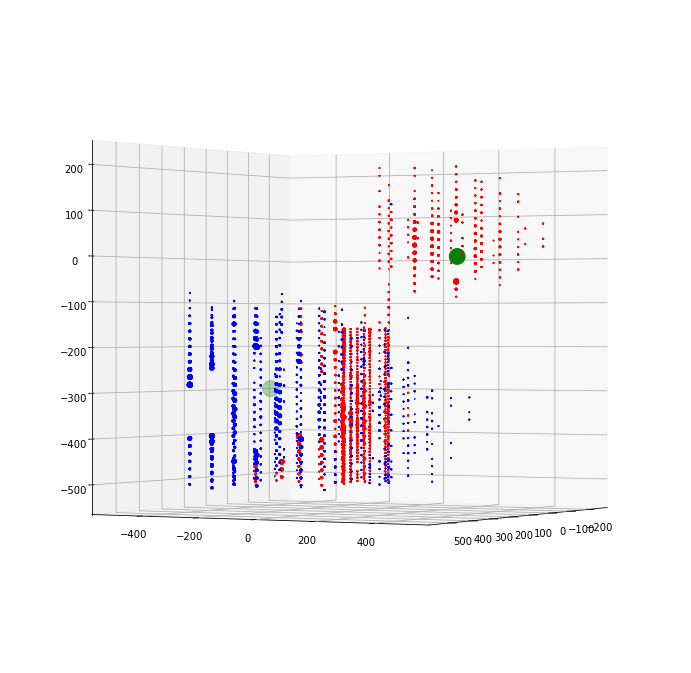

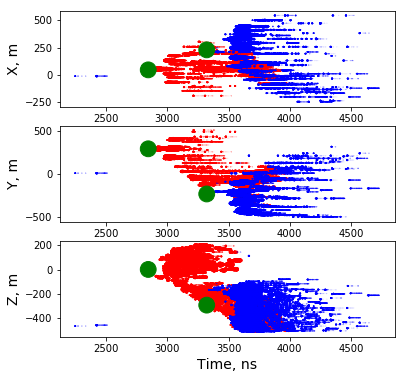

In [15]:
make_plots(y_pred_2_Mix,data[2][0],data[2][1],truth[2])

In [ ]:
y_pred_2_DBS = DBSCAN(eps=10000, min_samples=1000).fit_predict(data[2][0],data[2][1])
make_plots(y_pred_2_DBS,data[2][0],data[2][1],truth[2])

In [16]:
print y_pred_2_DBS[90000:90010]

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
